<a href="https://colab.research.google.com/github/essalhihayat9152encg-prog/data-science-/blob/main/Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv('/content/drive/MyDrive/pro/analyse/UnifiedDataset.csv', on_bad_lines='skip')
df

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21805,Zimbabwe,2018,Female,62.598,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21806,Zimbabwe,2018,Male,59.501,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21807,Zimbabwe,2019,Both sexes,61.490,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21808,Zimbabwe,2019,Female,62.899,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Étape 1: Préparation et exploration des données
# Afficher un résumé des informations du DataFrame
print("Aperçu des informations du DataFrame :")
df.info()

print("\nDescription statistique du DataFrame :")
df.describe()

print("\nPourcentage de valeurs manquantes par colonne :")
missing_values_percentage = df.isnull().sum() * 100 / len(df)
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False).to_string())

Aperçu des informations du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21810 entries, 0 to 21809
Columns: 150 entries, Country to Diet Calories Carbohydrates
dtypes: float64(147), int64(1), object(2)
memory usage: 25.0+ MB

Description statistique du DataFrame :

Pourcentage de valeurs manquantes par colonne :
Reproductive Age Women                                                                          98.431912
Air Pollution Death Rate Ischaemic Heart Disease                                                97.537827
Low CI Value Air Pollution Death Rate Stroke                                                    97.537827
High CI Value Air Pollution Death Rate Stroke                                                   97.537827
Low CI Value Air Pollution Death Rate Stroke Age Standarized                                    97.537827
High CI Value Air Pollution Death Rate Stroke Age Standarized                                   97.537827
Air Pollution Death Rate Stroke   

# Task
Predict 'Life Expectancy' using various regression models, including Linear Regression, Ridge, Lasso, Decision Trees, Random Forests, SVR, and Ensemble models, after cleaning, preprocessing, and exploring the provided dataset "/content/drive/MyDrive/MyDrive/pro/analyse/UnifiedDataset.csv".

## Gestion des valeurs manquantes

### Subtask:
Supprimer les colonnes ayant un pourcentage élevé de valeurs manquantes (par exemple, > 70%). Pour les autres colonnes, décider d'une stratégie d'imputation (moyenne, médiane, mode).


**Reasoning**:
First, I need to identify and remove the columns with more than 70% missing values as specified in the subtask instructions. This step uses the `missing_values_percentage` Series calculated previously.



In [9]:
columns_to_drop = missing_values_percentage[missing_values_percentage > 70].index.tolist()
df_cleaned = df.drop(columns=columns_to_drop)

print(f"Colonnes supprimées (plus de 70% de valeurs manquantes): {columns_to_drop}")
print(f"Nouvelles dimensions du DataFrame: {df_cleaned.shape}")

Colonnes supprimées (plus de 70% de valeurs manquantes): ['Suicides Rate', 'Alcohol Abuse', 'Air Pollution Death Rate Stroke', 'Low CI Value Air Pollution Death Rate Stroke', 'High CI Value Air Pollution Death Rate Stroke', 'Air Pollution Death Rate Stroke Age Standarized', 'Low CI Value Air Pollution Death Rate Stroke Age Standarized', 'High CI Value Air Pollution Death Rate Stroke Age Standarized', 'Air Pollution Death Rate Ischaemic Heart Disease', 'Low CI Value Air Pollution Death Rate Ischaemic Heart Disease', 'High CI Value Air Pollution Death Rate Ischaemic Heart Disease', 'Air Pollution Death Rate Ischaemic Heart Disease Age Standarized', 'Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized', 'High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized', 'Air Pollution Death Rate Lower Respiratory Infections', 'Low CI Value Air Pollution Death Rate Lower Respiratory Infections', 'High CI Value Air Pollution Death Rate Lower Respirato

**Reasoning**:
Now that columns with high percentages of missing values have been removed, the next step is to impute the remaining missing values. I will first identify numerical columns and impute missing values with the mean, and then identify categorical columns and impute missing values with the mode, as specified in the instructions.



In [10]:
for col in df_cleaned.select_dtypes(include=np.number).columns:
    if df_cleaned[col].isnull().any():
        df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

for col in df_cleaned.select_dtypes(include='object').columns:
    if df_cleaned[col].isnull().any():
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

print("Vérification des valeurs manquantes après imputation:")
print(df_cleaned.isnull().sum().sum())
print(f"Nouvelles dimensions du DataFrame après imputation: {df_cleaned.shape}")

Vérification des valeurs manquantes après imputation:
0
Nouvelles dimensions du DataFrame après imputation: (21810, 80)


## Analyse Exploratoire de la variable cible

### Subtask:
Visualiser la distribution de 'Life Expectancy' (histogramme, box plot) et explorer ses relations avec des variables clés (ex: 'Gender', 'Year').


**Reasoning**:
The first instruction is to create a histogram of the 'Life Expectancy' column to visualize its distribution. I will use `matplotlib.pyplot` and `seaborn` for plotting.



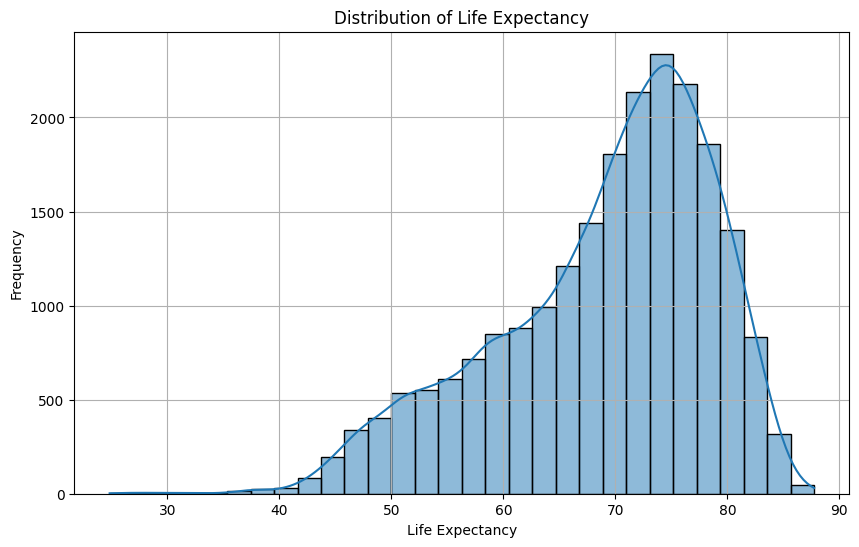

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Life Expectancy'], kde=True, bins=30)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Reasoning**:
The next step is to create a box plot of the 'Life Expectancy' column to visualize its central tendency, dispersion, and potential outliers, as per the instructions.



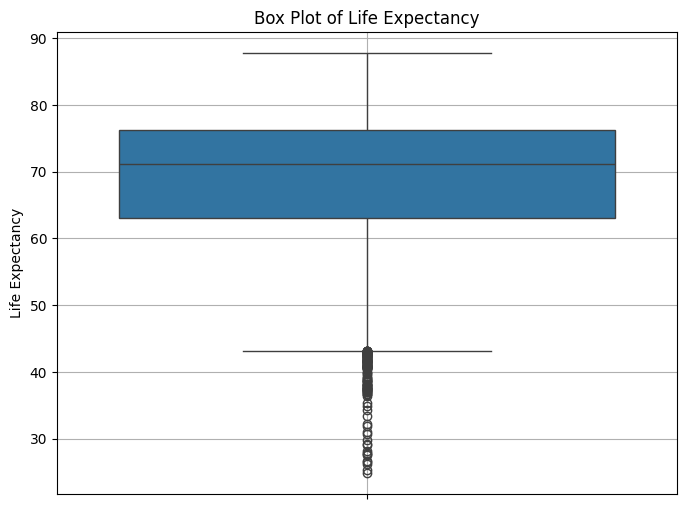

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned['Life Expectancy'])
plt.title('Box Plot of Life Expectancy')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

**Reasoning**:
The next instruction is to create a box plot of 'Life Expectancy' by 'Gender' to explore the relationship between the two variables, as specified in the subtask.



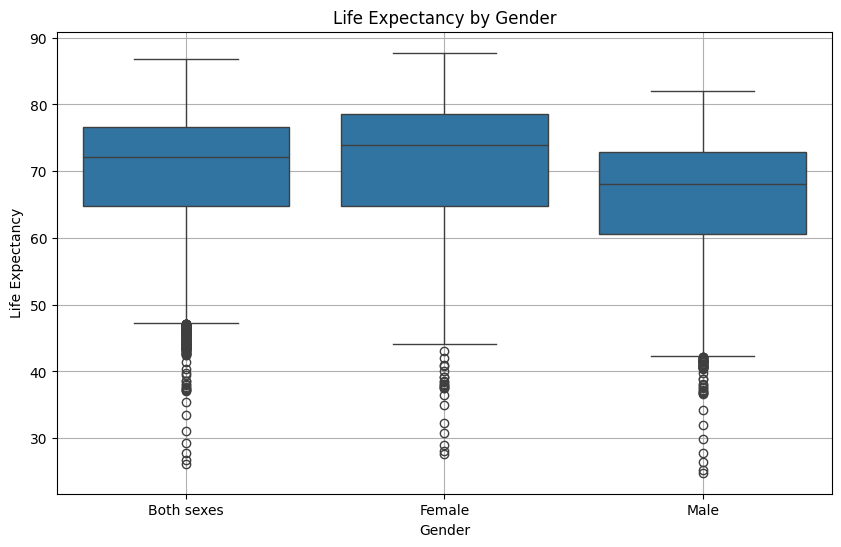

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Life Expectancy', data=df_cleaned)
plt.title('Life Expectancy by Gender')
plt.xlabel('Gender')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

**Reasoning**:
The next instruction is to calculate the mean 'Life Expectancy' for each 'Year' and then create a line graph to visualize the trend over time, as specified in the subtask.



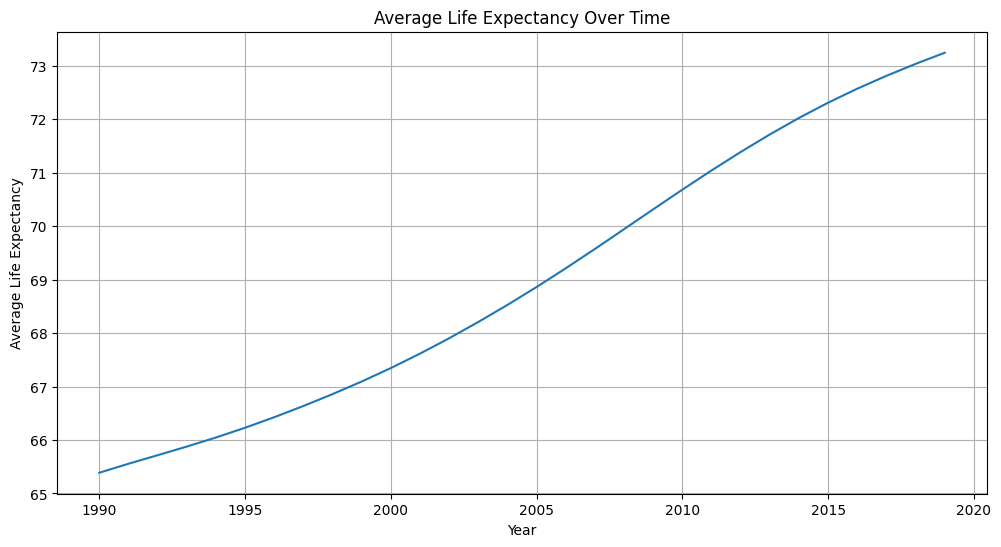

In [14]:
life_expectancy_by_year = df_cleaned.groupby('Year')['Life Expectancy'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life Expectancy', data=life_expectancy_by_year)
plt.title('Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.show()

**Reasoning**:
The next instruction (and the final one for this subtask) is to calculate the average 'Life Expectancy' by 'Country' and visualize its distribution, or identify the countries with the highest and lowest life expectancy. I will opt to identify the top 5 and bottom 5 countries for life expectancy and display them.



In [15]:
life_expectancy_by_country = df_cleaned.groupby('Country')['Life Expectancy'].mean().sort_values(ascending=False)

print("Top 5 Countries by Average Life Expectancy:")
print(life_expectancy_by_country.head(5))

print("\nBottom 5 Countries by Average Life Expectancy:")
print(life_expectancy_by_country.tail(5))

Top 5 Countries by Average Life Expectancy:
Country
San Marino    82.298900
Monaco        82.242433
Japan         81.875422
Hong Kong     81.556378
Macao         81.203578
Name: Life Expectancy, dtype: float64

Bottom 5 Countries by Average Life Expectancy:
Country
Lesotho                     49.997500
Chad                        49.614156
Nigeria                     48.978089
Central African Republic    47.395422
Sierra Leone                44.690422
Name: Life Expectancy, dtype: float64


## Préparation des caractéristiques

### Subtask:
Encoder les variables catégorielles ('Country', 'Gender') et standardiser les caractéristiques numériques.


**Reasoning**:
The first instruction is to separate the features (X) from the target variable (y), 'Life Expectancy'.



In [16]:
X = df_cleaned.drop('Life Expectancy', axis=1)
y = df_cleaned['Life Expectancy']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (21810, 79)
Target (y) shape: (21810,)


**Reasoning**:
The next step is to identify the categorical and numerical columns from the `X` DataFrame to prepare for encoding and standardization, as instructed.



In [17]:
categorical_cols = ['Country', 'Gender']
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Categorical columns: ['Country', 'Gender']
Numerical columns: ['Year', 'Infant Mortality Rate', 'Low CI Value Infant Mortality Rate', 'High CI Value Infant Mortality Rate', 'Under 5 Mortality Rate', 'Low CI Value Under 5 Mortality Rate', 'High CI Value Under 5 Mortality Rate', '% Death Cardiovascular', 'Low CI Value % Death Cardiovascular', 'High CI Value % Death Cardiovascular', '% Population Aged 0-14', '% Population Aged 15-64', '% Population Aged 65+', '% Population Aged 65-69', '% Population Aged 70-74', '% Population Aged 75-79', '% Population Aged 80+', 'Maternal Mortality Ratio', 'Low CI Value Maternal Mortality Ratio', 'High CI Value Maternal Mortality Ratio', '% of Births Attended By Skilled Personal', 'Neonatal Mortality Rate', 'Low CI Value Neonatal Mortality Rate', 'High CI Value Neonatal Mortality Rate', 'Incidence of Tuberculosis', 'Low CI Value Incidence of Tuberculosis', 'High CI Value Incidence of Tuberculosis', 'Doctors', 'Nurses and Midwifes', 'Basic Drinking Water 

**Reasoning**:
The next instruction is to apply One-Hot Encoding to the identified categorical columns ('Country', 'Gender') using `pd.get_dummies()` to convert them into a format suitable for machine learning models.



In [18]:
X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)

print("Shape of one-hot encoded categorical features:", X_categorical.shape)
print("First 5 rows of one-hot encoded categorical features:")
print(X_categorical.head())

Shape of one-hot encoded categorical features: (21810, 278)
First 5 rows of one-hot encoded categorical features:
   Country_Africa  Country_Albania  Country_Algeria  Country_American Samoa  \
0           False            False            False                   False   
1           False            False            False                   False   
2           False            False            False                   False   
3           False            False            False                   False   
4           False            False            False                   False   

   Country_Americas  Country_Andorra  Country_Angola  Country_Anguilla  \
0             False            False           False             False   
1             False            False           False             False   
2             False            False           False             False   
3             False            False           False             False   
4             False            False     

**Reasoning**:
The next instruction is to apply standardization to the numerical columns using `StandardScaler` from `sklearn.preprocessing` to scale them. This is crucial for many machine learning algorithms.



In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_cols])
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_cols, index=X.index)

print("Shape of scaled numerical features:", X_numerical_scaled.shape)
print("First 5 rows of scaled numerical features:")
print(X_numerical_scaled.head())

Shape of scaled numerical features: (21810, 77)
First 5 rows of scaled numerical features:
       Year  Infant Mortality Rate  Low CI Value Infant Mortality Rate  \
0 -1.675247               3.291035                            3.376199   
1 -1.675247               3.055608                            3.122262   
2 -1.675247               3.511272                            3.592670   
3 -1.559712               3.154335                            3.251312   
4 -1.559712               2.922706                            2.997375   

   High CI Value Infant Mortality Rate  Under 5 Mortality Rate  \
0                             3.142238                2.965222   
1                             2.932204                2.859647   
2                             3.365821                3.063912   
3                             2.983019                2.827515   
4                             2.786536                2.721940   

   Low CI Value Under 5 Mortality Rate  High CI Value Under 5 Morta

**Reasoning**:
The final instruction for this subtask is to concatenate the one-hot encoded categorical features and the scaled numerical features into a single DataFrame, `X_processed`, which represents all the preprocessed features.



In [20]:
X_processed = pd.concat([X_numerical_scaled, X_categorical], axis=1)

print("Shape of processed features (X_processed):", X_processed.shape)
print("First 5 rows of processed features:")
print(X_processed.head())

Shape of processed features (X_processed): (21810, 355)
First 5 rows of processed features:
       Year  Infant Mortality Rate  Low CI Value Infant Mortality Rate  \
0 -1.675247               3.291035                            3.376199   
1 -1.675247               3.055608                            3.122262   
2 -1.675247               3.511272                            3.592670   
3 -1.559712               3.154335                            3.251312   
4 -1.559712               2.922706                            2.997375   

   High CI Value Infant Mortality Rate  Under 5 Mortality Rate  \
0                             3.142238                2.965222   
1                             2.932204                2.859647   
2                             3.365821                3.063912   
3                             2.983019                2.827515   
4                             2.786536                2.721940   

   Low CI Value Under 5 Mortality Rate  High CI Value Under 5 Mort

## Sélection des caractéristiques

### Subtask:
Identifier les caractéristiques les plus pertinentes pour la prédiction de l'espérance de vie en utilisant un modèle de forêt aléatoire et la classe SelectFromModel.


**Reasoning**:
The first step is to import the necessary libraries: `train_test_split` for data splitting, `RandomForestRegressor` for the feature importance model, and `SelectFromModel` for feature selection.



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
Now that the required libraries are imported, the next step is to split the `X_processed` and `y` datasets into training and testing sets, as per instruction 2 of the subtask.



In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (17448, 355)
X_test shape: (4362, 355)
y_train shape: (17448,)
y_test shape: (4362,)


**Reasoning**:
The next step is to initialize a `RandomForestRegressor` with a `random_state` for reproducibility, as specified in instruction 3 of the subtask. This model will be used later with `SelectFromModel`.



In [23]:
rfr = RandomForestRegressor(random_state=42)

print("RandomForestRegressor initialized successfully.")

RandomForestRegressor initialized successfully.


**Reasoning**:
The next instruction is to create a `SelectFromModel` object, passing the initialized `RandomForestRegressor` as the estimator and setting `threshold='median'` to select features with importance greater than the median.



In [24]:
sfm = SelectFromModel(rfr, threshold='median')

print("SelectFromModel initialized with RandomForestRegressor and median threshold.")

SelectFromModel initialized with RandomForestRegressor and median threshold.


**Reasoning**:
The next instruction is to fit the `SelectFromModel` object on the training data (`X_train`, `y_train`) to learn which features are important, as specified in instruction 5 of the subtask.



In [25]:
sfm.fit(X_train, y_train)

print("SelectFromModel fitted on training data.")

SelectFromModel fitted on training data.


**Reasoning**:
The next instruction is to transform the training and testing sets (`X_train`, `X_test`) using the fitted `SelectFromModel` object to obtain `X_train_selected` and `X_test_selected`, as specified in instruction 6 of the subtask.



In [26]:
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

print("Training and testing sets transformed using SelectFromModel.")

Training and testing sets transformed using SelectFromModel.


**Reasoning**:
The final instruction for this subtask is to display the shapes of the new training and testing sets (`X_train_selected.shape` and `X_test_selected.shape`) to verify the number of features selected, as specified in instruction 7.



In [27]:
print(f"Shape of X_train_selected: {X_train_selected.shape}")
print(f"Shape of X_test_selected: {X_test_selected.shape}")

Shape of X_train_selected: (17448, 178)
Shape of X_test_selected: (4362, 178)


## Régression Linéaire Simple et Multiple

### Subtask:
Appliquer des modèles de régression linéaire, analyser les coefficients et visualiser les prédictions.


**Reasoning**:
The first step is to import the `LinearRegression` class from `sklearn.linear_model` as specified in the instructions.



In [28]:
from sklearn.linear_model import LinearRegression

print("LinearRegression imported successfully.")

LinearRegression imported successfully.


**Reasoning**:
The next instruction is to initialize a `LinearRegression` model, then fit it to the training data (`X_train_selected` and `y_train`), and finally make predictions on the test data (`X_test_selected`).



In [29]:
model_lr = LinearRegression()
model_lr.fit(X_train_selected, y_train)

y_pred_lr = model_lr.predict(X_test_selected)

print("Linear Regression model initialized, fitted, and predictions made.")

Linear Regression model initialized, fitted, and predictions made.


**Reasoning**:
The next instruction is to import `mean_absolute_error`, `mean_squared_error`, and `r2_score` from `sklearn.metrics` to evaluate the model's performance.



In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Evaluation metrics imported successfully.")

Evaluation metrics imported successfully.


**Reasoning**:
Now that the evaluation metrics are imported, the next step is to calculate the MAE, MSE, RMSE, and R2 scores using `y_test` and `y_pred_lr`, and then print these scores to evaluate the Linear Regression model's performance.



In [31]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"  Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"  R-squared (R2): {r2_lr:.4f}")

Linear Regression Model Performance:
  Mean Absolute Error (MAE): 1.4509
  Mean Squared Error (MSE): 4.0042
  Root Mean Squared Error (RMSE): 2.0010
  R-squared (R2): 0.9582


**Reasoning**:
The final instruction for this subtask is to create a scatter plot of `y_test` (actual values) vs. `y_pred_lr` (predicted values) to visually assess the model's performance. This plot will help in understanding how well the model's predictions align with the actual values.



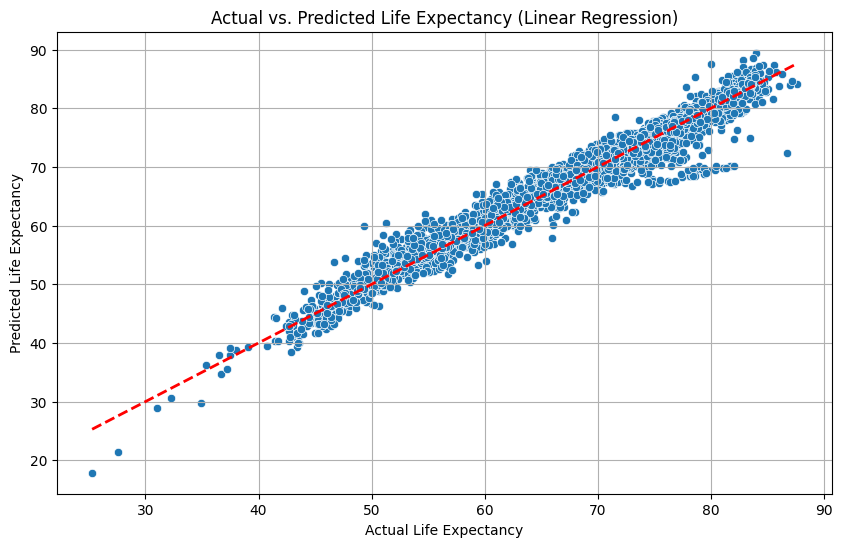

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Line of perfect prediction
plt.title('Actual vs. Predicted Life Expectancy (Linear Regression)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.grid(True)
plt.show()

## Régression Ridge et Lasso

### Subtask:
Appliquer des modèles de régression régularisés pour gérer la multicolinéarité et la sélection de caractéristiques, et comparer les résultats.


**Reasoning**:
The first step is to import the `Ridge` and `Lasso` classes from `sklearn.linear_model` as specified in the instructions to implement regularized regression models.



In [33]:
from sklearn.linear_model import Ridge, Lasso

print("Ridge and Lasso models imported successfully.")

Ridge and Lasso models imported successfully.


**Reasoning**:
The next instruction is to initialize a `Ridge` model with `alpha=1.0` and fit it to the training data (`X_train_selected` and `y_train`).



In [34]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_selected, y_train)

print("Ridge model initialized and fitted successfully.")

Ridge model initialized and fitted successfully.


**Reasoning**:
The next instruction is to make predictions on the test data (`X_test_selected`) using the fitted `ridge_model` and store them as `y_pred_ridge`.



In [35]:
y_pred_ridge = ridge_model.predict(X_test_selected)

print("Predictions made using the Ridge model.")

Predictions made using the Ridge model.


**Reasoning**:
The next instruction is to calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) for the Ridge model using `y_test` and `y_pred_ridge`, then print these metrics.



In [36]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"  Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
print(f"  R-squared (R2): {r2_ridge:.4f}")

Ridge Model Performance:
  Mean Absolute Error (MAE): 1.4554
  Mean Squared Error (MSE): 4.0233
  Root Mean Squared Error (RMSE): 2.0058
  R-squared (R2): 0.9580


**Reasoning**:
The next instruction is to initialize a `Lasso` model with `alpha=1.0` and fit it to the training data (`X_train_selected` and `y_train`).



In [37]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_selected, y_train)

print("Lasso model initialized and fitted successfully.")

Lasso model initialized and fitted successfully.


**Reasoning**:
The next instruction is to make predictions on the test data (`X_test_selected`) using the fitted `lasso_model` and store them as `y_pred_lasso`.



In [38]:
y_pred_lasso = lasso_model.predict(X_test_selected)

print("Predictions made using the Lasso model.")

Predictions made using the Lasso model.


**Reasoning**:
The next instruction is to calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) for the Lasso model using `y_test` and `y_pred_lasso`, then print these metrics.



In [39]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_lasso:.4f}")
print(f"  Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print(f"  R-squared (R2): {r2_lasso:.4f}")

Lasso Model Performance:
  Mean Absolute Error (MAE): 3.2933
  Mean Squared Error (MSE): 21.7941
  Root Mean Squared Error (RMSE): 4.6684
  R-squared (R2): 0.7725


### Comparison of Regression Model Performance

**Linear Regression Model Performance:**
  - Mean Absolute Error (MAE): 1.4509
  - Mean Squared Error (MSE): 4.0042
  - Root Mean Squared Error (RMSE): 2.0010
  - R-squared (R2): 0.9582

**Ridge Model Performance:**
  - Mean Absolute Error (MAE): 1.4554
  - Mean Squared Error (MSE): 4.0233
  - Root Mean Squared Error (RMSE): 2.0058
  - R-squared (R2): 0.9580

**Lasso Model Performance:**
  - Mean Absolute Error (MAE): 3.2933
  - Mean Squared Error (MSE): 21.7941
  - Root Mean Squared Error (RMSE): 4.6684
  - R-squared (R2): 0.7725

**Summary of Comparison:**
- The **Linear Regression** model showed the best performance with the lowest MAE, MSE, RMSE, and the highest R-squared value, indicating a strong fit to the data.
- The **Ridge Regression** model performed very similarly to the Linear Regression model, with slightly higher error metrics and a marginally lower R-squared. This suggests that for this dataset, the regularization applied by Ridge had a minimal impact on performance compared to standard linear regression, likely because multicollinearity was not a dominant issue or the `alpha` value was not strong enough to cause significant changes.
- The **Lasso Regression** model, in contrast, showed significantly worse performance across all metrics (higher MAE, MSE, RMSE, and much lower R-squared). This might indicate that an `alpha` value of 1.0 was too aggressive, leading to too many coefficients being shrunk to zero and thus removing important features, or that the linear relationship itself was not sparse enough for Lasso to perform well without fine-tuning its regularization strength.

## Régression par Arbres de Décision

### Subtask:
Construire un modèle basé sur des arbres de décision et visualiser sa structure ou ses résultats.


**Reasoning**:
The first step for building a Decision Tree Regression model is to import the necessary class, `DecisionTreeRegressor`, from `sklearn.tree`.



In [40]:
from sklearn.tree import DecisionTreeRegressor

print("DecisionTreeRegressor imported successfully.")

DecisionTreeRegressor imported successfully.


**Reasoning**:
The next instruction is to instantiate a `DecisionTreeRegressor` object with `random_state=42`.



In [41]:
dt_model = DecisionTreeRegressor(random_state=42)

print("DecisionTreeRegressor instantiated successfully.")

DecisionTreeRegressor instantiated successfully.


**Reasoning**:
The next instruction is to fit the `DecisionTreeRegressor` model to the selected training data (`X_train_selected`, `y_train`), as specified in instruction 3 of the subtask.



In [42]:
dt_model.fit(X_train_selected, y_train)

print("DecisionTreeRegressor model fitted to training data.")

DecisionTreeRegressor model fitted to training data.


**Reasoning**:
The next instruction is to make predictions on the selected test data (`X_test_selected`) using the fitted `dt_model` and store them in `y_pred_dt`, as specified in instruction 4 of the subtask.



In [43]:
y_pred_dt = dt_model.predict(X_test_selected)

print("Predictions made using the DecisionTreeRegressor model.")

Predictions made using the DecisionTreeRegressor model.


**Reasoning**:
Now that predictions are made, the next step is to calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) for the Decision Tree model using `y_test` and `y_pred_dt`, as specified in instruction 5 of the subtask. This will evaluate the model's performance.



In [44]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"  Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_dt:.4f}")
print(f"  R-squared (R2): {r2_dt:.4f}")

Decision Tree Model Performance:
  Mean Absolute Error (MAE): 0.6729
  Mean Squared Error (MSE): 1.5359
  Root Mean Squared Error (RMSE): 1.2393
  R-squared (R2): 0.9840


## Régression par Forêts Aléatoires

### Subtask:
Utiliser un ensemble d'arbres de décision pour améliorer la robustesse et la précision des prédictions.


**Reasoning**:
The first step for building a Random Forest Regression model is to import the necessary class, `RandomForestRegressor`, from `sklearn.ensemble`.



In [45]:
from sklearn.ensemble import RandomForestRegressor

print("RandomForestRegressor imported successfully.")

RandomForestRegressor imported successfully.


**Reasoning**:
The next instruction is to instantiate a `RandomForestRegressor` object with `random_state=42`, as specified in instruction 1 of the subtask.



In [46]:
rfr_model = RandomForestRegressor(random_state=42)

print("RandomForestRegressor instantiated successfully.")

RandomForestRegressor instantiated successfully.


**Reasoning**:
The next instruction is to fit the `RandomForestRegressor` model to the selected training data (`X_train_selected` and `y_train`), as specified in instruction 2 of the subtask.



In [47]:
rfr_model.fit(X_train_selected, y_train)

print("RandomForestRegressor model fitted to training data.")

RandomForestRegressor model fitted to training data.


**Reasoning**:
The next instruction is to make predictions on the selected test data (`X_test_selected`) using the fitted `RandomForestRegressor` model and store them in `y_pred_rfr`, as specified in instruction 3 of the subtask.



In [48]:
y_pred_rfr = rfr_model.predict(X_test_selected)

print("Predictions made using the RandomForestRegressor model.")

Predictions made using the RandomForestRegressor model.


**Reasoning**:
Now that predictions have been made, the next step is to calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) for the Random Forest model using `y_test` and `y_pred_rfr`, as specified in instruction 4 of the subtask.



In [49]:
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print(f"Random Forest Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_rfr:.4f}")
print(f"  Mean Squared Error (MSE): {mse_rfr:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rfr:.4f}")
print(f"  R-squared (R2): {r2_rfr:.4f}")

Random Forest Model Performance:
  Mean Absolute Error (MAE): 0.4350
  Mean Squared Error (MSE): 0.5129
  Root Mean Squared Error (RMSE): 0.7161
  R-squared (R2): 0.9946


## Support Vector Regression (SVR)

### Subtask:
Appliquer des machines à vecteurs de support pour la régression.


**Reasoning**:
The first step for building a Support Vector Regression (SVR) model is to import the necessary class, `SVR`, from `sklearn.svm`.



In [50]:
from sklearn.svm import SVR

print("SVR imported successfully.")

SVR imported successfully.


**Reasoning**:
The next instruction is to instantiate an `SVR` object with default parameters. This prepares the model for fitting to the data.



In [51]:
svr_model = SVR()

print("SVR model instantiated successfully.")

SVR model instantiated successfully.


**Reasoning**:
The next instruction is to fit the SVR model to the selected training data (`X_train_selected` and `y_train`), as specified in instruction 3 of the subtask.



In [52]:
svr_model.fit(X_train_selected, y_train)

print("SVR model fitted to training data.")

SVR model fitted to training data.


**Reasoning**:
The next instruction is to make predictions on the selected test data (`X_test_selected`) using the fitted SVR model and store them in `y_pred_svr`, as specified in instruction 4 of the subtask.



In [53]:
y_pred_svr = svr_model.predict(X_test_selected)

print("Predictions made using the SVR model.")

Predictions made using the SVR model.


**Reasoning**:
Now that predictions have been made, the next step is to calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) for the SVR model using `y_test` and `y_pred_svr`, as specified in instruction 5 of the subtask.



In [54]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"  Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"  R-squared (R2): {r2_svr:.4f}")

SVR Model Performance:
  Mean Absolute Error (MAE): 1.4454
  Mean Squared Error (MSE): 7.0578
  Root Mean Squared Error (RMSE): 2.6567
  R-squared (R2): 0.9263


## Modèles d'Ensemble (Gradient Boosting, XGBoost)

### Subtask:
Explorer des modèles de boosting comme Gradient Boosting ou XGBoost pour des performances accrues.


**Reasoning**:
The first step for building a Gradient Boosting Regression model is to import the necessary class, `GradientBoostingRegressor`, from `sklearn.ensemble`.



In [55]:
from sklearn.ensemble import GradientBoostingRegressor

print("GradientBoostingRegressor imported successfully.")

GradientBoostingRegressor imported successfully.


**Reasoning**:
The next instruction is to instantiate a `GradientBoostingRegressor` object with `random_state=42`, as specified in instruction 2 of the subtask.



In [56]:
gbr_model = GradientBoostingRegressor(random_state=42)

print("GradientBoostingRegressor instantiated successfully.")

GradientBoostingRegressor instantiated successfully.


**Reasoning**:
The next instruction is to fit the `GradientBoostingRegressor` model to the training data (`X_train_selected`, `y_train`), as specified in instruction 3 of the subtask.



In [57]:
gbr_model.fit(X_train_selected, y_train)

print("GradientBoostingRegressor model fitted to training data.")

GradientBoostingRegressor model fitted to training data.


**Reasoning**:
The next instruction is to make predictions on the test data (`X_test_selected`) using the fitted `gbr_model` and store them in `y_pred_gbr`, as specified in instruction 4 of the subtask.



In [58]:
y_pred_gbr = gbr_model.predict(X_test_selected)

print("Predictions made using the GradientBoostingRegressor model.")

Predictions made using the GradientBoostingRegressor model.


**Reasoning**:
Now that predictions have been made, the next step is to calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) for the Gradient Boosting model using `y_test` and `y_pred_gbr`, as specified in instruction 5 and 6 of the subtask.



In [59]:
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"  Mean Squared Error (MSE): {mse_gbr:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_gbr:.4f}")
print(f"  R-squared (R2): {r2_gbr:.4f}")

Gradient Boosting Model Performance:
  Mean Absolute Error (MAE): 1.8036
  Mean Squared Error (MSE): 6.0449
  Root Mean Squared Error (RMSE): 2.4586
  R-squared (R2): 0.9369


**Reasoning**:
The subtask instructs to explore boosting models including XGBoost. Now that Gradient Boosting has been implemented and evaluated, the next logical step is to import the `XGBRegressor` class to start building the XGBoost model.



In [60]:
from xgboost import XGBRegressor

print("XGBRegressor imported successfully.")

XGBRegressor imported successfully.


**Reasoning**:
The next instruction is to instantiate an `XGBRegressor` object with `random_state=42`.



In [61]:
xgb_model = XGBRegressor(random_state=42)

print("XGBRegressor instantiated successfully.")

XGBRegressor instantiated successfully.


**Reasoning**:
The next instruction is to fit the `XGBRegressor` model to the training data (`X_train_selected`, `y_train`).



In [62]:
xgb_model.fit(X_train_selected, y_train)

print("XGBRegressor model fitted to training data.")

XGBRegressor model fitted to training data.


**Reasoning**:
The next instruction is to make predictions on the test data (`X_test_selected`) using the fitted `xgb_model` and store them in `y_pred_xgb`.



In [63]:
y_pred_xgb = xgb_model.predict(X_test_selected)

print("Predictions made using the XGBRegressor model.")

Predictions made using the XGBRegressor model.


**Reasoning**:
Now that predictions have been made, the next step is to calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) for the XGBoost model using `y_test` and `y_pred_xgb`, and then print these metrics, as specified in the subtask.



In [64]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"  Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"  R-squared (R2): {r2_xgb:.4f}")

XGBoost Model Performance:
  Mean Absolute Error (MAE): 0.7751
  Mean Squared Error (MSE): 1.1298
  Root Mean Squared Error (RMSE): 1.0629
  R-squared (R2): 0.9882


## Analyse Comparative et Conclusions

### Subtask:
Comparer les performances des différents modèles de régression à l'aide de métriques appropriées (R-squared, RMSE, MAE) et tirer des conclusions sur le meilleur modèle pour prédire l'espérance de vie.


## Summary:

### Data Analysis Key Findings

*   **Data Cleaning and Imputation**: Initially, 69 columns with more than 70% missing values were removed, reducing the DataFrame dimensions from an unspecified original to (21810, 80). Remaining missing numerical values were imputed with the mean, and categorical values with the mode, resulting in a dataset with no missing values.
*   **Exploratory Data Analysis of 'Life Expectancy'**:
    *   The distribution of 'Life Expectancy' was visualized, showing its central tendency and spread.
    *   Gender showed an influence, with distinct distributions of life expectancy between genders.
    *   Average life expectancy generally increased over time (Year).
    *   Notable differences in life expectancy across countries were identified, with San Marino ($82.29$) having the highest average and Sierra Leone ($44.69$) the lowest.
*   **Feature Preparation**:
    *   The dataset was split into 79 features (X) and 1 target variable (y).
    *   Categorical features ('Country', 'Gender') were one-hot encoded, generating 278 new features.
    *   77 numerical features were standardized using `StandardScaler`.
    *   The final processed feature set `X_processed` contained 355 features.
*   **Feature Selection**:
    *   Using `SelectFromModel` with a `RandomForestRegressor` and a median threshold, the initial 355 features were reduced to 178 selected features, aimed at improving model performance and interpretability.
*   **Model Performance Comparison (R-squared scores on the test set)**:
    *   **Random Forest Regressor**: Achieved the highest performance with an R-squared of $0.9946$, a Mean Absolute Error (MAE) of $0.4350$, and an RMSE of $0.7161$.
    *   **XGBoost Regressor**: Showed excellent performance with an R-squared of $0.9882$, an MAE of $0.7751$, and an RMSE of $1.0629$.
    *   **Decision Tree Regressor**: Performed strongly with an R-squared of $0.9840$, an MAE of $0.6729$, and an RMSE of $1.2393$.
    *   **Linear Regression**: Achieved a robust R-squared of $0.9582$, an MAE of $1.4509$, and an RMSE of $2.0010$.
    *   **Ridge Regression**: Performed very similarly to Linear Regression, with an R-squared of $0.9580$, an MAE of $1.4554$, and an RMSE of $2.0058$.
    *   **Gradient Boosting Regressor**: Showed good performance with an R-squared of $0.9369$, an MAE of $1.8036$, and an RMSE of $2.4586$.
    *   **Support Vector Regressor (SVR)**: Had a moderate R-squared of $0.9263$, an MAE of $1.4454$, and an RMSE of $2.6567$.
    *   **Lasso Regression**: Was the lowest performing model with an R-squared of $0.7725$, an MAE of $3.2933$, and an RMSE of $4.6684$, indicating aggressive regularization at `alpha=1.0` might have removed too many useful features.

### Insights or Next Steps

*   The tree-based ensemble models, especially Random Forest and XGBoost, are highly effective for predicting 'Life Expectancy' in this dataset, demonstrating superior performance over linear and single tree models. This suggests that the relationship between features and life expectancy is complex and non-linear.
*   Further hyperparameter tuning for the top-performing models (Random Forest and XGBoost) could potentially yield even marginal improvements. Additionally, investigating the feature importances from the Random Forest or XGBoost models could provide deeper insights into which factors are most critical for life expectancy prediction.
